**Q1: On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**
1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.   What metric would you report for this dataset?
3.   What is its value?

In [ ]:
# numpy makes numerical analysis with arrays (np.array) and linear algebra easy
import numpy as np 
# pandas is for data processing and making data easily readable 
import pandas as pd 

In [ ]:
# --- mounting Gdrive to google colab env ---
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# --- importing the dataset ---
orders_data = pd.read_csv('/content/drive/My Drive/data/Shopify Data Science Challenge/ordersData.csv') # file location in my Google Colab env

# printing first 20 values of the dataset
orders_data.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
# turning order_amount column into nparray to later perform simple statistical calculations 
order_amount_nparray = np.array(orders_data['order_amount'])

# calculating mean of order_amount 
mean = np.mean(order_amount_nparray)

# calculating median of order_amount
median = np.median(order_amount_nparray)

# calculate range of order_amount
range = np.ptp(order_amount_nparray)

In [ ]:
# printing mean, median, range of order_amount
print("Mean: ", mean, 
      "\nMedian: ", median,
      "\nRange: ", range)

Mean:  3145.128 
Median:  284.0 
Range:  703910


### **Outliers are Present in the Dataset**
From some simple statistical descriptors, it's clear that there must be outliers in the dataset. `The mean is well above the median at $3145.128 while the range of the dataset is an insane value of $703 910.`

Calculating the mean or averages from a dataset with outlier(s) will result in the final value diverging from the overall pattern in the distribution.

### **Identifying Outliers**
Evaluating the mean, median, and range - one could conclude that the outliers are high outliers (in other words, the outliers are present in the 3rd or 4th quartile). 

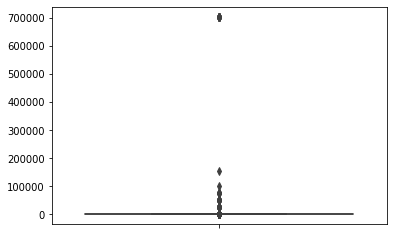

In [ ]:
# plotting order_amount to visualize outliers
import seaborn as sns
sns.boxplot(y=order_amount_nparray)

In [ ]:
# calculate IQR (interquartile range) using formula IQR = Q3 - Q1
Q1 = np.percentile(order_amount_nparray, 25)
Q3 = np.percentile(order_amount_nparray, 75)
IQR = Q3 - Q1
# print IQR
print("IQR: ", IQR)

IQR:  227.0


In [ ]:
# high outliers are above this value 
high_outlier = Q3 + 1.5 * IQR
print("High outliers: >", high_outlier)

# low outliers are below this value 
low_outlier = Q1 - 1.5 * IQR
print("Low outliers: <", low_outlier)

High outliers: > 730.5
Low outliers: < -177.5


As we've observed previously, the data seems to have high outliers and not low outliers as the price of sneakers are on the lower range. It doesn't make sense to rule out low outliers as there are none in this dataset since all values are above 0, the price range of sneakers is relatively low, and the negative value to rule out low outliers doesn't make sense. 

In [ ]:
# filtering orders_data to remove outliers by removing all data where order_amount < 730.5
removed_outliers_data = pd.DataFrame(orders_data[orders_data['order_amount'] < high_outlier])

# fixes the issue of columns and rows being truncated or not displaying 
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# displaying all the outlier data
display(removed_outliers_data.head(10))

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
orders_amount_noOutliers = np.array(removed_outliers_data['order_amount'])

# calculating mean of order_amount 
mean_noOutliers = np.mean(orders_amount_noOutliers)

# calculating median of order_amount
median_noOutliers = np.median(orders_amount_noOutliers)

# printing mean, median, range of order_amount
print("Mean: ", mean_noOutliers, 
      "\nMedian: ", median_noOutliers)

Mean:  293.7153735336489 
Median:  280.0


### **Calculate AOV after Removing Outliers**
I recommend using either the mean or median to calculate the AOV after removing the outliers from the original dataset. Since AOV is usually calculated with the revenue/# of orders (essentially the mean), I'm going to go with an **AOV value of ~$293.72** derived using the mean of the order_amount. 

### **Conclusion About Outliers**
My hypothesis is that the outliers could've been shops focused on luxury sneakers or B2B transactions. 

## **Answer to Questions**

**1a)** Since the median is usually more repsentative of the common patterns in a distribution with outliers, I recommend using the median to estimate the AOV in the original dataset with outliers to gauge a rough estimate of what your final AOV calculation based on a dataset with removed outliers should be around. The median of the original dataset is $284. I evaluated the AOV by removing outliers from the dataset then calculating the mean arriving at an AOV value of ~$293.72. The median of the original dataset is pretty close to the final AOV value I calculated after removing outliers.

**1b)** AOV is the metric I just calculated, but another metric I would suggest calculating is the repeating customers from this dataset which I will do below. 

In [ ]:
# counting the occurences of all unique user_id's
user_id_data = pd.value_counts(orders_data['user_id'])

# displaying the occurences of all unique user_id's
display(user_id_data)

718    28
868    27
847    26
791    26
727    25
787    25
786    25
734    24
823    24
793    24
932    24
745    24
999    24
969    23
759    23
852    23
723    23
968    23
848    23
922    23
785    23
842    23
789    23
857    23
975    23
712    23
942    22
705    22
711    22
884    22
853    22
799    22
811    22
921    22
934    22
986    22
871    22
768    22
863    22
923    22
756    22
762    21
979    21
845    21
778    21
746    21
994    21
774    21
794    21
996    21
967    21
978    21
983    21
894    21
987    21
874    21
875    21
800    21
985    21
808    21
731    20
980    20
736    20
841    20
912    20
784    20
970    20
944    20
992    20
749    20
933    20
906    20
839    20
849    19
954    19
818    19
798    19
829    19
858    19
721    19
725    19
890    19
790    19
713    19
953    19
959    19
764    19
901    19
883    19
738    19
990    19
920    19
864    19
860    19
836    19
773    18
815    18
925    18
761    18
834    18


In [ ]:
print("Mean: ", user_id_data.mean(),
      "\nMedian: ", user_id_data.median())

Mean:  16.611295681063122 
Median:  16.0


**1b)** User_Id 718 seems like a really loyal customer as that user has the most orders at 28 orders. Also, it seems that all users in this dataset ar repeating customers at least for the duration of this dataset. User with the id 717 has the least amount of orders at 7 total orders. These sneaker shops seems to be doing well with retention of customers. 

In [ ]:
from datetime import datetime as dt

# cleaning up created_at column so date would only contain date and not time 
orders_data['created_at'] = pd.to_datetime(orders_data['created_at']).dt.normalize()

# counting all occurences of each unique day
date_orders = pd.value_counts(orders_data['created_at'])

# displaying the occurences of orders on each unique day
display(date_orders)

2017-03-09    199
2017-03-17    198
2017-03-07    196
2017-03-01    182
2017-03-02    182
2017-03-21    179
2017-03-28    175
2017-03-26    175
2017-03-22    175
2017-03-18    173
2017-03-25    170
2017-03-27    170
2017-03-10    167
2017-03-30    167
2017-03-11    167
2017-03-29    165
2017-03-04    165
2017-03-05    163
2017-03-03    162
2017-03-13    159
2017-03-12    159
2017-03-20    158
2017-03-08    156
2017-03-24    155
2017-03-23    152
2017-03-19    149
2017-03-14    148
2017-03-06    148
2017-03-15    143
2017-03-16    143
Name: created_at, dtype: int64

In [ ]:
print("Mean: ", date_orders.mean(),
      "\nMedian: ", date_orders.median())

Mean:  166.66666666666666 
Median:  166.0


In [ ]:
# cleaning up created_at column so a new column called day_name will contain the day name value
orders_data['day_name'] = pd.to_datetime(orders_data['created_at']).dt.day_name()

# counting all occurences of each unique day of the week
dayName_orders = pd.value_counts(orders_data['day_name'])

# displaying the occurences of all unique orders on a given day of the week
display(dayName_orders)

Thursday     843
Wednesday    821
Tuesday      698
Friday       682
Saturday     675
Sunday       646
Monday       635
Name: day_name, dtype: int64

**1b)** Another metric we can extract from this data is which day executed the most orders and which day executed the least orders as well as the median. Also, we can figure out which day of the week has the most orders. 

In [ ]:
# calculate IQR (interquartile range) using formula IQR = Q3 - Q1
Q1_items = np.percentile(orders_data['total_items'], 25)
Q3_items = np.percentile(orders_data['total_items'], 75)
IQR_items = Q3_items - Q1_items
# print IQR
print("IQR: ", IQR_items)

# high outliers are above this value 
high_outlier_items = Q3_items + 1.5 * IQR_items
print("High outliers: >", high_outlier_items)

IQR:  2.0
High outliers: > 6.0


In [ ]:
# filtering orders_data to remove outliers by removing all data where order_amount < 730.5
removed_outliers_items = pd.DataFrame(orders_data[orders_data['total_items'] < high_outlier_items])

# displaying all the outlier data
display(removed_outliers_items.head(20))

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,day_name
0,1,53,746,224,2,cash,2017-03-13,Monday
1,2,92,925,90,1,cash,2017-03-03,Friday
2,3,44,861,144,1,cash,2017-03-14,Tuesday
3,4,18,935,156,1,credit_card,2017-03-26,Sunday
4,5,18,883,156,1,credit_card,2017-03-01,Wednesday
5,6,58,882,138,1,credit_card,2017-03-14,Tuesday
6,7,87,915,149,1,cash,2017-03-01,Wednesday
7,8,22,761,292,2,cash,2017-03-08,Wednesday
8,9,64,914,266,2,debit,2017-03-17,Friday
9,10,52,788,146,1,credit_card,2017-03-30,Thursday


In [ ]:
# calculating mean of total_items without outliers 
mean_items = np.mean(np.array(removed_outliers_items['total_items']))

# printing mean of total_items (AKA Average Basket Value)
print("Mean: ", mean_items)

Mean:  1.9855218178162075


**1b)** Another metric I extracted is the average basket value by calculating the mean of total_items after removing the outliers. 

**1c)** **Key Metrics Extracted from the Dataset**

1.   The median number of orders from each unique user is 16. 
2.   The most orders was executed on 2017-03-09, while the least number of orders was executed on 2017-03-16. The median number of orders executed on days where at least 1 order is executed is 166 orders. Thrusdays has the most orders at 843 orders executed, while Mondays has the least orders at 635 orders executed. 
3.   The average basket value is ~2. 

